In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay
from yellowbrick.model_selection import validation_curve 
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from yellowbrick.model_selection import validation_curve 
from sklearn.metrics import f1_score

2023-09-25 01:22:56.700688: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Student Performance

## Data PreProcessing

In [4]:
data = pd.read_csv('/Users/sehaj/Documents/GitHub/Machine-Learning/Studen prformace engineering/DATA (1).csv')
column_labels = [
    "Student Age",
    "Sex",
    "Graduated high-school type",
    "Scholarship type",
    "Additional work",
    "Regular artistic or sports activity",
    "Do you have a partner",
    "Total salary if available",
    "Transportation to the university",
    "Accommodation type in Cyprus",
    "Mothers' education",
    "Fathers' education",
    "Number of sisters/brothers",
    "Parental status",
    "Mothers' occupation",
    "Fathers' occupation",
    "Weekly study hours",
    "Reading frequency (non-scientific books/journals)",
    "Reading frequency (scientific books/journals)",
    "Attendance to the seminars/conferences related to the department",
    "Impact of your projects/activities on your success",
    "Attendance to classes",
    "Preparation to midterm exams 1",
    "Preparation to midterm exams 2",
    "Taking notes in classes",
    "Listening in classes",
    "Discussion improves my interest and success in the course",
    "Flip-classroom",
    "Cumulative grade point average in the last semester (/4.00)",
    "Expected Cumulative grade point average in graduation (/4.00)",
    "Course ID",
    "GRADE"
]
# Define a function to map grades to binary values
def map_grade(grade):
    if grade > 6:
        return 1  # Good
    else:
        return 0  # Bad

# Apply the mapping function to the GRADE column
data['GRADE'] = data['GRADE'].apply(map_grade)

# Assuming you have a dataframe df with a 'GRADE' column
threshold = 6
classifieddata = data
#classifieddata['GRADE'] = classifieddata['GRADE'].apply(lambda x: 'good' if x > threshold else 'bad')
classifieddata

classifieddata= classifieddata.drop('STUDENT ID', axis=1)
classifieddata.columns  = column_labels
# Print the updated DataFrame
print(data)

     STUDENT ID  1  2  3  4  5  6  7  8  9  ...  23  24  25  26  27  28  29  \
0      STUDENT1  2  2  3  3  1  2  2  1  1  ...   1   1   3   2   1   2   1   
1      STUDENT2  2  2  3  3  1  2  2  1  1  ...   1   1   3   2   3   2   2   
2      STUDENT3  2  2  2  3  2  2  2  2  4  ...   1   1   2   2   1   1   2   
3      STUDENT4  1  1  1  3  1  2  1  2  1  ...   1   2   3   2   2   1   3   
4      STUDENT5  2  2  1  3  2  2  1  3  1  ...   2   1   2   2   2   1   2   
..          ... .. .. .. .. .. .. .. .. ..  ...  ..  ..  ..  ..  ..  ..  ..   
140  STUDENT141  2  1  2  3  1  1  2  1  1  ...   1   1   2   1   2   1   3   
141  STUDENT142  1  1  2  4  2  2  2  1  4  ...   1   1   3   2   2   1   5   
142  STUDENT143  1  1  1  4  2  2  2  1  1  ...   1   1   3   3   2   1   4   
143  STUDENT144  2  1  2  4  1  1  1  5  2  ...   2   1   2   1   2   1   5   
144  STUDENT145  1  1  1  5  2  2  2  3  1  ...   2   1   3   2   3   1   5   

     30  COURSE ID  GRADE  
0     1          1     

## Algorithm

In [5]:
X = classifieddata.drop('GRADE', axis=1)
y = classifieddata['GRADE']
print(X.shape)
print(y.shape)

(145, 31)
(145,)


In [6]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)
print(x_train.shape)
print(x_test.shape)



(108, 31)
(37, 31)


In [7]:

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')  # You can use different kernel functions


# Fit the classifier on the training data
svm_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.7837837837837838


##  Kernel Type (accuracies)

In [28]:

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')  # You can use different kernel functions


# Fit the classifier on the training data
svm_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.8378378378378378


In [29]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.33      0.50      0.40         4

    accuracy                           0.84        37
   macro avg       0.63      0.69      0.65        37
weighted avg       0.87      0.84      0.85        37



In [8]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, y_pred))
import fscore
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000, dual="auto"),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
    
)
models = (clf.fit(x_train, y_train) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Assuming you have a test dataset X_test and y_test
for clf, title in zip(models, titles):
    y_pred = clf.predict(x_test)
    accuracy = f1_macro(y_test, y_pred)
    print(f"{title} Accuracy: {accuracy:.2f}")



SVC with linear kernel Accuracy: 0.84
LinearSVC (linear kernel) Accuracy: 0.81
SVC with RBF kernel Accuracy: 0.89
SVC with polynomial (degree 3) kernel Accuracy: 0.81


In [9]:
modelnames = ("linear", "rbf", "poly")

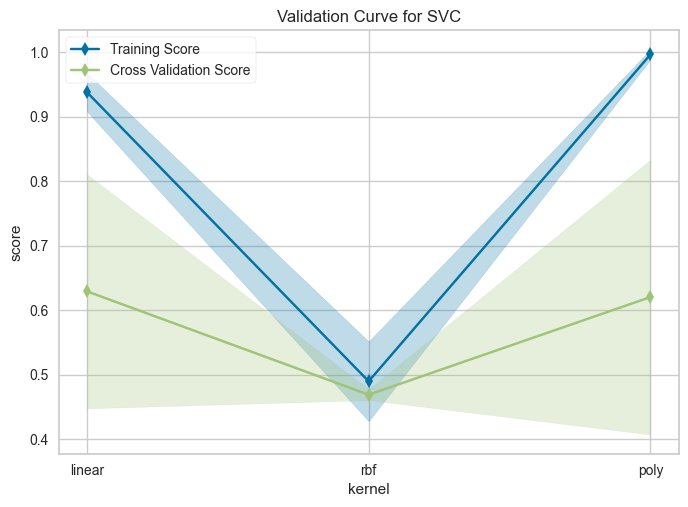

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for SVC'}, xlabel='kernel', ylabel='score'>,
                cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
                param_name='kernel',
                param_range=array(['linear', 'rbf', 'poly'], dtype='<U6'),
                scoring='f1_macro')


In [30]:
print(validation_curve(svm_classifier, X, y, param_name="kernel", n_jobs=-1,
      param_range= modelnames, cv=10, scoring="f1_macro"))

## Learning Curve before

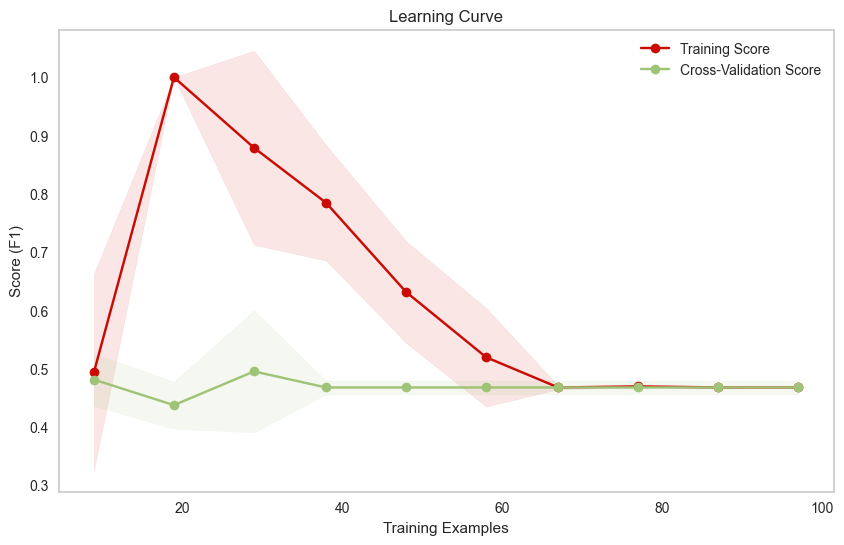

In [8]:
## Learning Curve after GridSearch

svm1 = SVC()


train_sizes, train_scores, test_scores = learning_curve(svm1, x_train, y_train, cv =10, n_jobs = -1, train_sizes =  np.linspace(0.1, 1.0, 10), scoring = 'f1_macro')
# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
# Create a learning curve plot
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score (F1)")
# Plot the mean training and test scores
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

# Add a legend
plt.legend(loc="best")

# Show the plot
plt.show()

## GridSearch Kernels

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
svm = SVC()

param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 'scale', 'auto'],
}

In [17]:
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='f1_macro')


In [18]:
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='f1_macro')

In [22]:
best_params = grid_search.best_params_
best_svm = grid_search.best_estimator_
grid_results = grid_search.cv_results_

print(best_params)
print(best_svm) 
y_pred = best_svm.predict(x_test)


{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
SVC(C=1, gamma=0.1, kernel='linear')


In [13]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.25      0.50      0.33         4

    accuracy                           0.78        37
   macro avg       0.59      0.66      0.60        37
weighted avg       0.86      0.78      0.81        37



## Learning Curve after GridSearch

In [12]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, y_pred))

svm1 = SVC(kernel='linear', C=1, gamma=0.1)


train_sizes, train_scores, test_scores = learning_curve(svm1, x_train, y_train, cv =10, n_jobs = -1, train_sizes =  np.linspace(0.1, 1.0, 10), scoring = 'f1_macro')

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.25      0.50      0.33         4

    accuracy                           0.78        37
   macro avg       0.59      0.66      0.60        37
weighted avg       0.86      0.78      0.81        37



In [10]:
# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

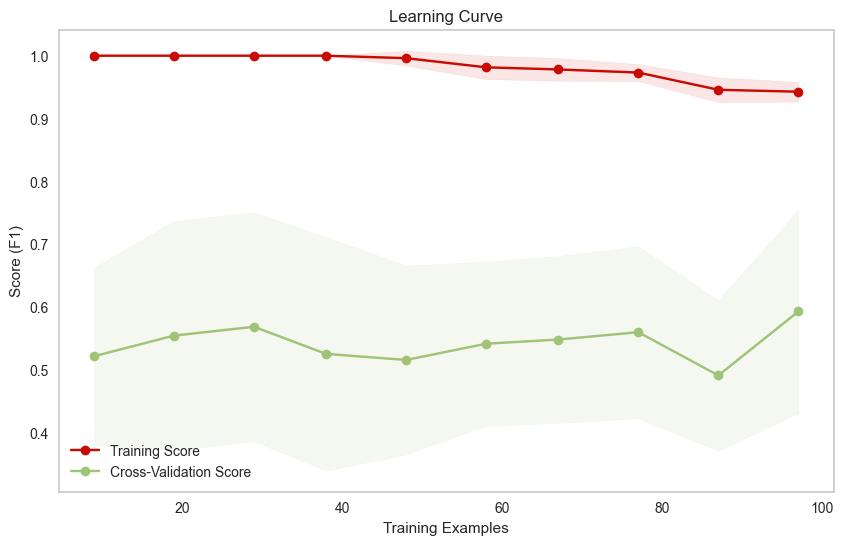

In [11]:
# Create a learning curve plot
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score (F1)")
# Plot the mean training and test scores
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

# Add a legend
plt.legend(loc="best")

# Show the plot
plt.show()

# Adult Income

## Preprocessing


In [6]:
X2_train = pd.read_csv('/Users/sehaj/Documents/GitHub/Machine-Learning/Extra Data/Final_Adult/X2_Train.csv')
X2_test = pd.read_csv('/Users/sehaj/Documents/GitHub/Machine-Learning/Extra Data/Final_Adult/X2_Test.csv')
y2_train = pd.read_csv('/Users/sehaj/Documents/GitHub/Machine-Learning/Extra Data/Final_Adult/y2_Train.csv')    
y2_test = pd.read_csv('/Users/sehaj/Documents/GitHub/Machine-Learning/Extra Data/Final_Adult/y2_Test.csv')

In [7]:
X2_train = X2_train.drop('Unnamed: 0', axis=1)
X2_test = X2_test.drop('Unnamed: 0', axis=1)
y2_train = y2_train.drop('Unnamed: 0', axis=1)
y2_test = y2_test.drop('Unnamed: 0', axis=1)
X2_train = X2_train.drop('Unnamed: 0.1', axis=1)
X2_test = X2_test.drop('Unnamed: 0.1', axis=1)



In [8]:
#X_train, X_test, y_train, y_test = train_test_split(classifieddata, column_labels, test_size=0.2, random_state=42)
# Standardize features using StandardScaler
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)


In [9]:
y2_train_new = y2_train.values.reshape(-1)

##  Kernel Type (accuracies)

In [10]:

# Create an SVM classifier
svm_classifier2 = SVC()  # You can use different kernel functions


# Fit the classifier on the training data
svm_classifier2.fit(X2_train_scaled, y2_train_new)

# Make predictions on the test data
y2_pred = svm_classifier2.predict(X2_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y2_test, y2_pred)
print("Test accuracy:", accuracy)

KeyboardInterrupt: 

In [51]:
import sklearn.metrics as metrics
print(metrics.classification_report(y2_test, y2_pred))


              precision    recall  f1-score   support

           0       0.87      0.95      0.91     12435
           1       0.76      0.54      0.63      3846

    accuracy                           0.85     16281
   macro avg       0.81      0.75      0.77     16281
weighted avg       0.84      0.85      0.84     16281



In [49]:
import sklearn.metrics as metrics
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000, dual="auto"),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
    
)
models = (clf.fit(x_train, y_train) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Assuming you have a test dataset X_test and y_test
for clf, title in zip(models, titles):
    y_pred = clf.predict(x_test)
    accuracy = f1_score(y_test, y_pred)
    print(f"{title} F1_Score: {accuracy:.2f}")



              precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.33      0.50      0.40         4

    accuracy                           0.84        37
   macro avg       0.63      0.69      0.65        37
weighted avg       0.87      0.84      0.85        37

SVC with linear kernel F1_Score: 0.40
LinearSVC (linear kernel) F1_Score: 0.36
SVC with RBF kernel F1_Score: 0.00
SVC with polynomial (degree 3) kernel F1_Score: 0.36


## Learning Curve before

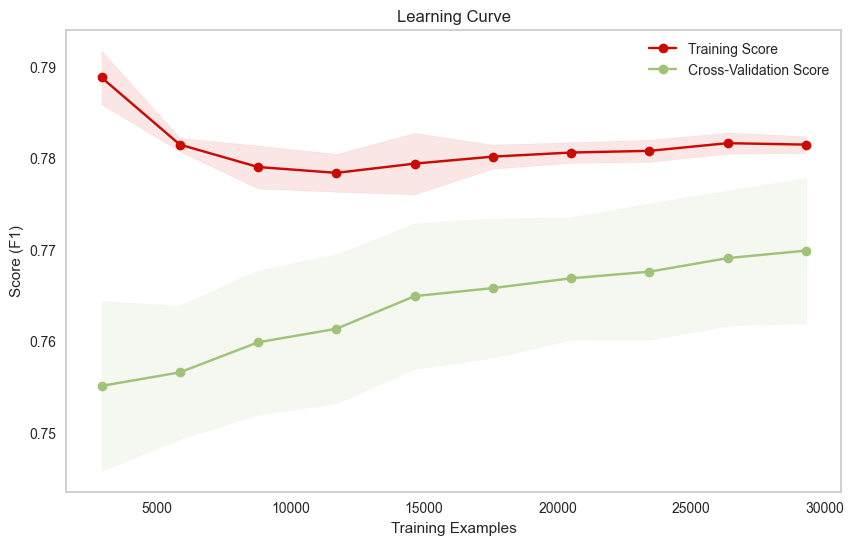

In [53]:
## Learning Curve after GridSearch

svm2 = SVC()


train_sizes, train_scores, test_scores = learning_curve(svm2, X2_train_scaled, y2_train_new, cv =10, n_jobs = -1, train_sizes =  np.linspace(0.1, 1.0, 10), scoring = 'f1_macro')
# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
# Create a learning curve plot
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score (F1)")
# Plot the mean training and test scores
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

# Add a legend
plt.legend(loc="best")

# Show the plot
plt.show()

## Validation Curve kernel

In [45]:
modelnames = ("linear", "rbf", "poly")

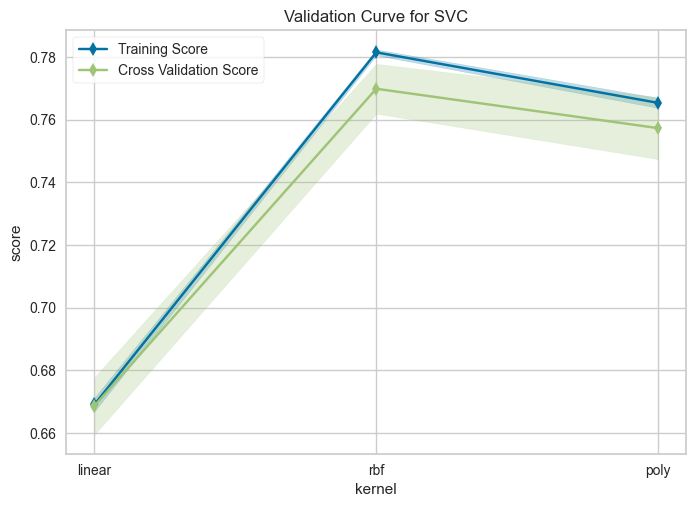

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for SVC'}, xlabel='kernel', ylabel='score'>,
                cv=10, estimator=SVC(), n_jobs=-1, param_name='kernel',
                param_range=array(['linear', 'rbf', 'poly'], dtype='<U6'),
                scoring='f1_macro')


In [52]:
print(validation_curve(svm_classifier2, X2_train_scaled, y2_train_new, param_name="kernel", n_jobs=-1,
      param_range= modelnames, cv=10, scoring="f1_macro"))

## GridSearch Kernels

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
svm2 = SVC()

param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
}

In [13]:
grid_search = GridSearchCV(estimator=svm2, param_grid=param_grid, cv=5, scoring='f1_macro')


In [14]:
grid_search.fit(X2_train_scaled, y2_train_new)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'kernel': ['linear', 'rbf', 'poly']},
             scoring='f1_macro')

In [15]:
best_params = grid_search.best_params_
best_svm = grid_search.best_estimator_
grid_results = grid_search.cv_results_

print(best_params)
print(best_svm) 
y2_pred = best_svm.predict(X2_test_scaled)


{'kernel': 'rbf'}
SVC()


In [16]:
import sklearn.metrics as metrics
print(metrics.classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     12435
           1       0.76      0.54      0.63      3846

    accuracy                           0.85     16281
   macro avg       0.81      0.75      0.77     16281
weighted avg       0.84      0.85      0.84     16281



## Learning Curve after GridSearch

In [21]:
import sklearn.metrics as metrics
print(metrics.classification_report(y2_test, y2_pred))

svm2 = SVC(kernel='rbf', C=1, gamma=0.1)


train_sizes, train_scores, test_scores = learning_curve(svm2, X2_train_scaled, y2_train_new, cv =10, n_jobs = -1, train_sizes =  np.linspace(0.1, 1.0, 10), scoring = 'f1_macro')

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     12435
           1       0.76      0.54      0.63      3846

    accuracy                           0.85     16281
   macro avg       0.81      0.75      0.77     16281
weighted avg       0.84      0.85      0.84     16281



In [22]:
# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

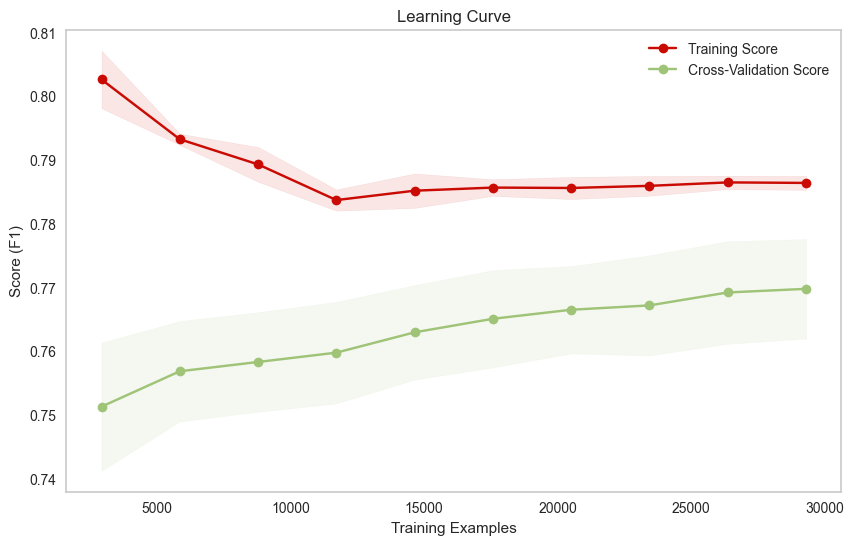

In [23]:
# Create a learning curve plot
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score (F1)")
# Plot the mean training and test scores
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

# Add a legend
plt.legend(loc="best")

# Show the plot
plt.show()